In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

In [5]:
# data2022edited = pd.read_excel('/content/2022edited.xlsx')
data_combined = pd.read_excel('/content/Combined2019-2022.xlsx')

# data2022edited.to_csv('csv_file.csv', index=False)
# data = pd.read_csv('/content/csv_file.csv')
data_combined.to_csv('csv_file.csv', index=False)
data_combined = pd.read_csv('/content/csv_file.csv')
data_combined.columns


Index(['pH Raw', 'pH PTC', 'pH PTC\n (OL)', 'pH SWC', 'pH Filter',
       'pH Finish\n (OL)', 'pH Finish', 'Chlorine Free', 'Chlorine Total',
       'Chlorine Sample', 'Chlorine Analyzer', 'Colour Raw A', 'Colour Raw T',
       'Colour SWC A', 'Colour Filter A', 'Turbidity Raw',
       'Turbidity Raw (OL)', 'Turbidity SWC', 'Turbidity Filter',
       'Turbidity Finish', 'Turbidity Finish (OL)',
       'Total Dissolved\n Solids Raw', 'Total Dissolved \nSolids PTC',
       'Total Dissolved \nSolids SWC', 'Total Dissolved\n Solids Filter',
       'Total Dissolved\n Solids Finish', 'Conductivity Raw',
       'Conductivity\n PTC', 'Conductivity \nSWC', 'Conductivity\n Filter',
       'Conductivity \nFinish', 'Hardness Raw', 'Hardness \nFinish',
       'Alkalinity Raw', 'Alkalinity Finish', 'Aluminum Finish\n (Free)',
       'Temperature Raw', 'Temperature Finish', 'Cl Demand', 'UVT Raw',
       'UVT Filter', 'UVA Raw', 'UVA Filter', 'Flows withinin plant Raw',
       'Flows withinin\n plant

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Colour Raw A', ylabel='Turbidity Raw'>

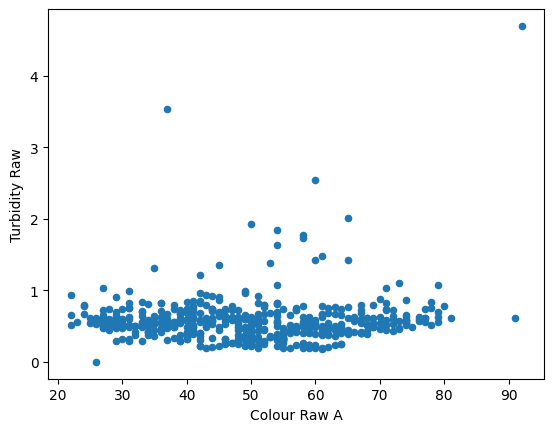

In [6]:
data_combined.plot.scatter(x='Colour Raw A',y='Turbidity Raw')

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Colour Raw T', ylabel='Turbidity SWC'>

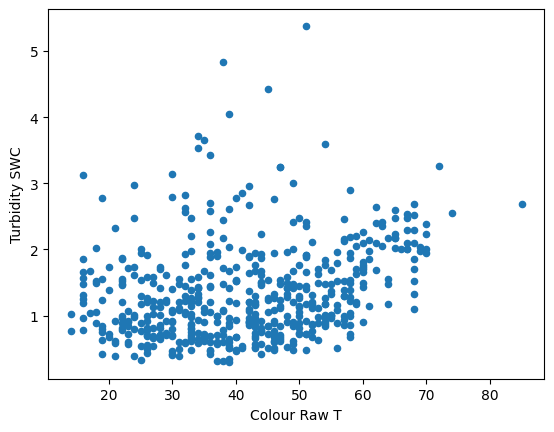

In [8]:
data_combined.plot.scatter(x='Colour Raw T',y='Turbidity SWC')

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Colour SWC A', ylabel='Turbidity Finish'>

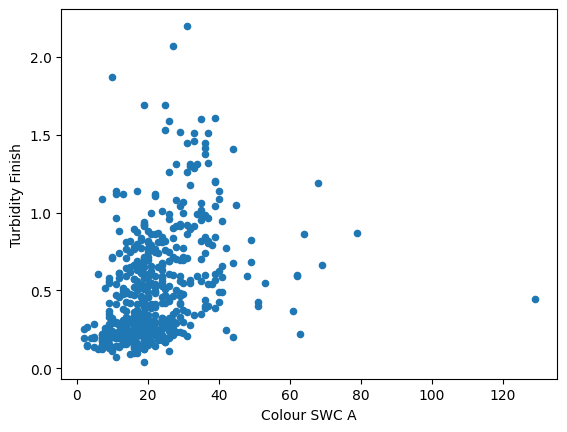

In [10]:
data_combined.plot.scatter(x='Colour SWC A',y='Turbidity Finish')

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Colour Filter A', ylabel='Turbidity Finish'>

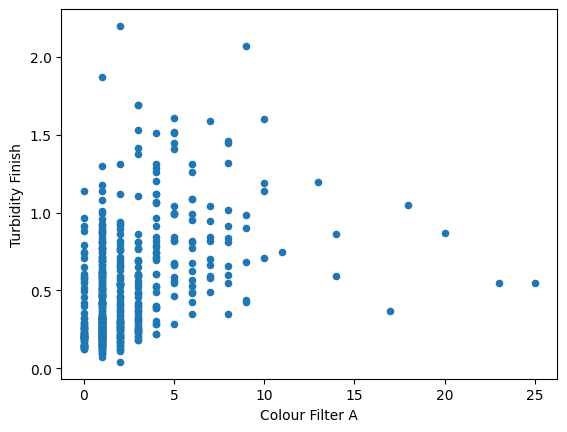

In [11]:
data_combined.plot.scatter(x='Colour Filter A',y='Turbidity Finish')

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Colour Raw T', ylabel='Turbidity Finish'>

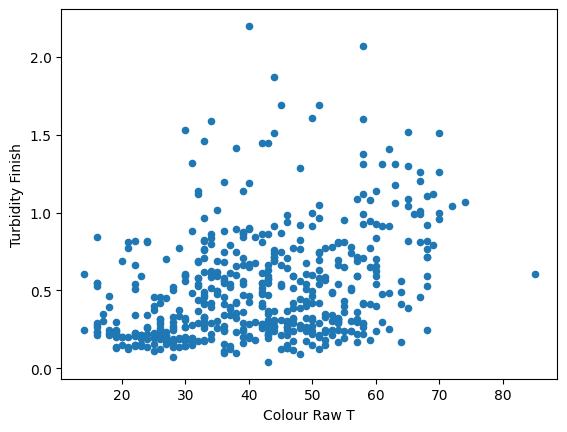

In [12]:
data_combined.plot.scatter(x='Colour Raw T',y='Turbidity Finish')

In [30]:
# X=data_combined[['Colour SWC A']]
# Y=data_combined[['Turbidity Finish']]
X=data_combined[['Colour Raw T']]
Y=data_combined[['Turbidity SWC']]



In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# scale the training and testing data
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
X_reduced_train = pca.fit_transform(x_train)
X_reduced_test = pca.fit_transform(x_test)

regressor = DecisionTreeRegressor(random_state=0,max_depth=5)
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regressor,
           x_train, y_train, cv=cv,
           scoring='neg_mean_squared_error').mean() 
#train PCR model on training data 
Model = regressor.fit(X_reduced_train, y_train)
Score_train = Model.score(X_reduced_train, y_train)
Score_test =Model.score(X_reduced_test, y_test)
print("Score of train: ",Score_train)
print("Score of test: ",Score_test)

pred = regressor.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

Score of train:  0.17600868376217083
Score of test:  0.07251462088676208


0.6883021328536217